# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [43]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get path and print contents of directory
path = os.getcwd()
print(path)
print(os.listdir(path))

# Using Google Colab
#path_to_data = 'step3_output.csv'

# Using computer with data folder
path_to_data = 'data/step3_output.csv'

# Create dataframe of step 3 output using path_to_data
df = pd.read_csv(path_to_data)

df.head()

/Users/tiffanyflor/Dropbox/MyProjects/GuidedCapstone
['updated_ski_data.csv', 'Notebook_step6.ipynb', 'Notebook_step4and5.ipynb', 'Notebook_step2.ipynb', '.DS_Store', 'models', 'Notebook_step3.ipynb', 'figures', '.ipynb_checkpoints', 'data']


,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alyeska Resort,Alaska,3939,2500,250,1,0.0,0,2,2,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,0
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,0
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,0,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.0,1,0,2,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,1
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,0.0,0,1,2,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,1


In [44]:
sample = df.drop(['Name','AdultWeekend','state','summit_elev','base_elev'], axis=1)
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vertical_drop      330 non-null    int64  
 1   trams              330 non-null    int64  
 2   fastEight          330 non-null    float64
 3   fastSixes          330 non-null    int64  
 4   fastQuads          330 non-null    int64  
 5   quad               330 non-null    int64  
 6   triple             330 non-null    int64  
 7   double             330 non-null    int64  
 8   surface            330 non-null    int64  
 9   total_chairs       330 non-null    int64  
 10  Runs               330 non-null    float64
 11  TerrainParks       330 non-null    float64
 12  LongestRun_mi      330 non-null    float64
 13  SkiableTerrain_ac  330 non-null    float64
 14  Snow Making_ac     330 non-null    float64
 15  daysOpenLastYear   330 non-null    float64
 16  yearsOpen          330 non

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [45]:
# PREDICTING AdultWeekend PRICE

# first we import the preprocessing package from the sklearn library
from sklearn import preprocessing

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name','AdultWeekend','state','summit_elev','base_elev' from the df
X = df.drop(['Name','AdultWeekend','state','summit_elev','base_elev'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df.AdultWeekend

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled = scaler.transform(X) 

In [46]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [47]:
#all third model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred = model.predict(X_test)

print('Explained Variance Score: ' + str(explained_variance_score(y_test, y_pred)))
print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, y_pred)))
print('Intercept: ' + str(lm.intercept_))

Explained Variance Score: 0.9313136899657813
Mean Absolute Error: 5.237370092894817
Intercept: 64.06402559903322


In [48]:
# Print pandas DataFrame displaying the coefficients of features: 
pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)

,Coefficient
AdultWeekday,19.902847
vertical_drop,1.680613
averageSnowfall,1.621054
quad,1.512615
triple,1.403843
Runs,1.382259
surface,1.289715
clusters,1.259339
daysOpenLastYear,1.222912
fastQuads,0.678088


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [49]:
ac = df[df['Name'].str.contains('Big Mountain')]

In [50]:
big_mtn_scaled = scaler.transform(df[df['Name'].str.contains('Big Mountain')].drop(['Name','AdultWeekend','state','summit_elev','base_elev'], axis=1))

**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [51]:
bmr_pred_weekend = model.predict(big_mtn_scaled)

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [52]:
print("Big Mountain Resort predicted Adult Weekend price is $%s " % ' '.join(map(str, bmr_pred_weekend)))

Big Mountain Resort predicted Adult Weekend price is $88.32731167356293 


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [53]:
weekend_price = df[df['Name'].str.contains('Big Mountain')].AdultWeekend
print("Big Mountain Resort Adult Weekend price currently is $%s " % ' '.join(map(str, weekend_price)))

Big Mountain Resort Adult Weekend price currently is $81.0 


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

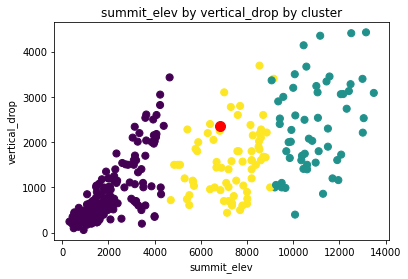

In [54]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='red', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

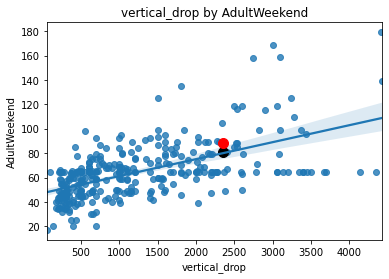

In [55]:
sns.regplot(x='vertical_drop',y='AdultWeekend', data=df)
#original
plt.scatter(ac['vertical_drop'], ac['AdultWeekend'], c='black', s=100)
#predicted
plt.scatter(ac['vertical_drop'], bmr_pred_weekend, c='red', s=100)
plt.title('vertical_drop by AdultWeekend')
plt.savefig('figures/fig2.png',bbox_inches='tight')

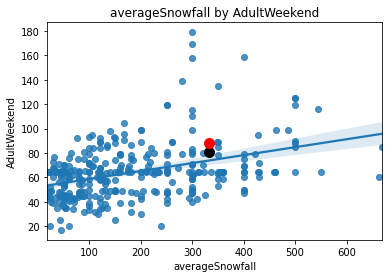

In [56]:
sns.regplot(x='averageSnowfall', y='AdultWeekend', data=df)
#original
plt.scatter(ac['averageSnowfall'], ac['AdultWeekend'], c='black', s=100)
#predicted
plt.scatter(ac['averageSnowfall'], bmr_pred_weekend, c='red', s=100)
plt.title('averageSnowfall by AdultWeekend')
plt.savefig('figures/fig3.png',bbox_inches='tight')

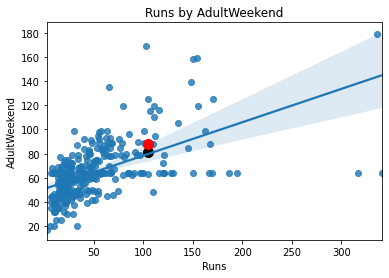

In [57]:
sns.regplot(x='Runs',y='AdultWeekend', data=df)
#original
plt.scatter(ac['Runs'], ac['AdultWeekend'], c='black', s=100)
#predicted
plt.scatter(ac['Runs'], bmr_pred_weekend, c='red', s=100)
plt.title('Runs by AdultWeekend')
plt.savefig('figures/fig4.png',bbox_inches='tight')

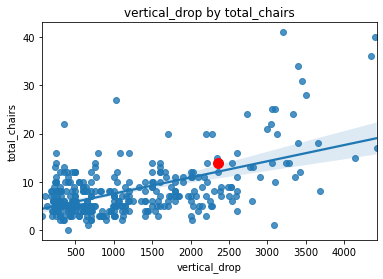

In [58]:
#plt.scatter(df['vertical_drop'], df['total_chairs'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
sns.regplot(x='vertical_drop',y='total_chairs', data=df)
plt.scatter(ac['vertical_drop'], ac['total_chairs'], c='red', s=100)
plt.xlabel('vertical_drop')
plt.ylabel('total_chairs')
plt.title('vertical_drop by total_chairs')
plt.savefig('figures/fig5.png',bbox_inches='tight')

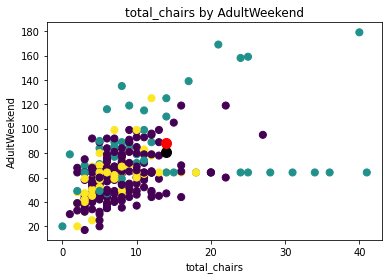

In [59]:
plt.scatter(df['total_chairs'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['total_chairs'], ac['AdultWeekend'], c='black', s=100)
plt.scatter(ac['total_chairs'], bmr_pred_weekend, c='red', s=100)
plt.xlabel('total_chairs')
plt.ylabel('AdultWeekend')
plt.title('total_chairs by AdultWeekend')
plt.savefig('figures/fig5.png',bbox_inches='tight')

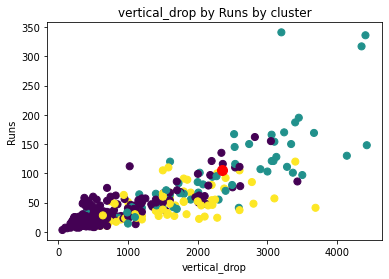

In [60]:
plt.scatter(df['vertical_drop'], df['Runs'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['vertical_drop'], ac['Runs'], c='red', s=100)
plt.xlabel('vertical_drop')
plt.ylabel('Runs')
plt.title('vertical_drop by Runs by cluster')
plt.savefig('figures/fig7.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [61]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients for the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [63]:
coeff_df = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
coeff_df['MAE'] = mean_absolute_error(y_test, y_pred)
coeff_df['ExpVar'] = explained_variance_score(y_test, y_pred)
coeff_df.to_csv('data/model_metrics.csv', index=False)

In [64]:
coeff_df

,Coefficient,MAE,ExpVar
vertical_drop,1.680613,5.23737,0.931314
trams,0.275381,5.23737,0.931314
fastEight,0.034003,5.23737,0.931314
fastSixes,0.439517,5.23737,0.931314
fastQuads,0.678088,5.23737,0.931314
quad,1.512615,5.23737,0.931314
triple,1.403843,5.23737,0.931314
double,0.300000,5.23737,0.931314
surface,1.289715,5.23737,0.931314
total_chairs,0.650290,5.23737,0.931314
